# Week 3 Practical

This week's practical will be a bit different, it is intended to be completed alongside watching the week's materials. The practical will make use of the FaIR model, a simple Finite Amplitude Impulse-Response climate-carbon-cycle model. This model is a simple-as-possible but still scientifically useful climate model.

## INSTRUCTIONS

Complete the tasks listed on moodle in week 3 in order, where practical tasks will be numbered like the videos. This practical notebook will also note when you are supposed to be watching moodle material.

### remember - Make sure to run each code section as you pass it 

# 3.0 PRACTICAL - Test that the practical notebook runs
run the following code sections to check that FaIR is working.

In [1]:
pip install fair

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

In [3]:
import fair
fair.__version__

'1.6.1'

In [4]:
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)

The “engine” of FaIR is the fair_scm function in the forward module.

In [5]:
from fair.forward import fair_scm

## Test run of FaIR

Here FaIR is run with a step change $CO_2$ emissions and sinusoidal non-$CO_2$ forcing timeseries. 

The output from FaIR is a 3-tuple of (C,F,T) arrays. In $CO_2$ mode, both C (representing $CO_2$ concentrations in ppm) and F (total radiative forcing in W m-2) are 1D arrays. T (temperature change since the pre-industrial) is always output as a 1D array.

You should see 4 graphs propduced by the code section below

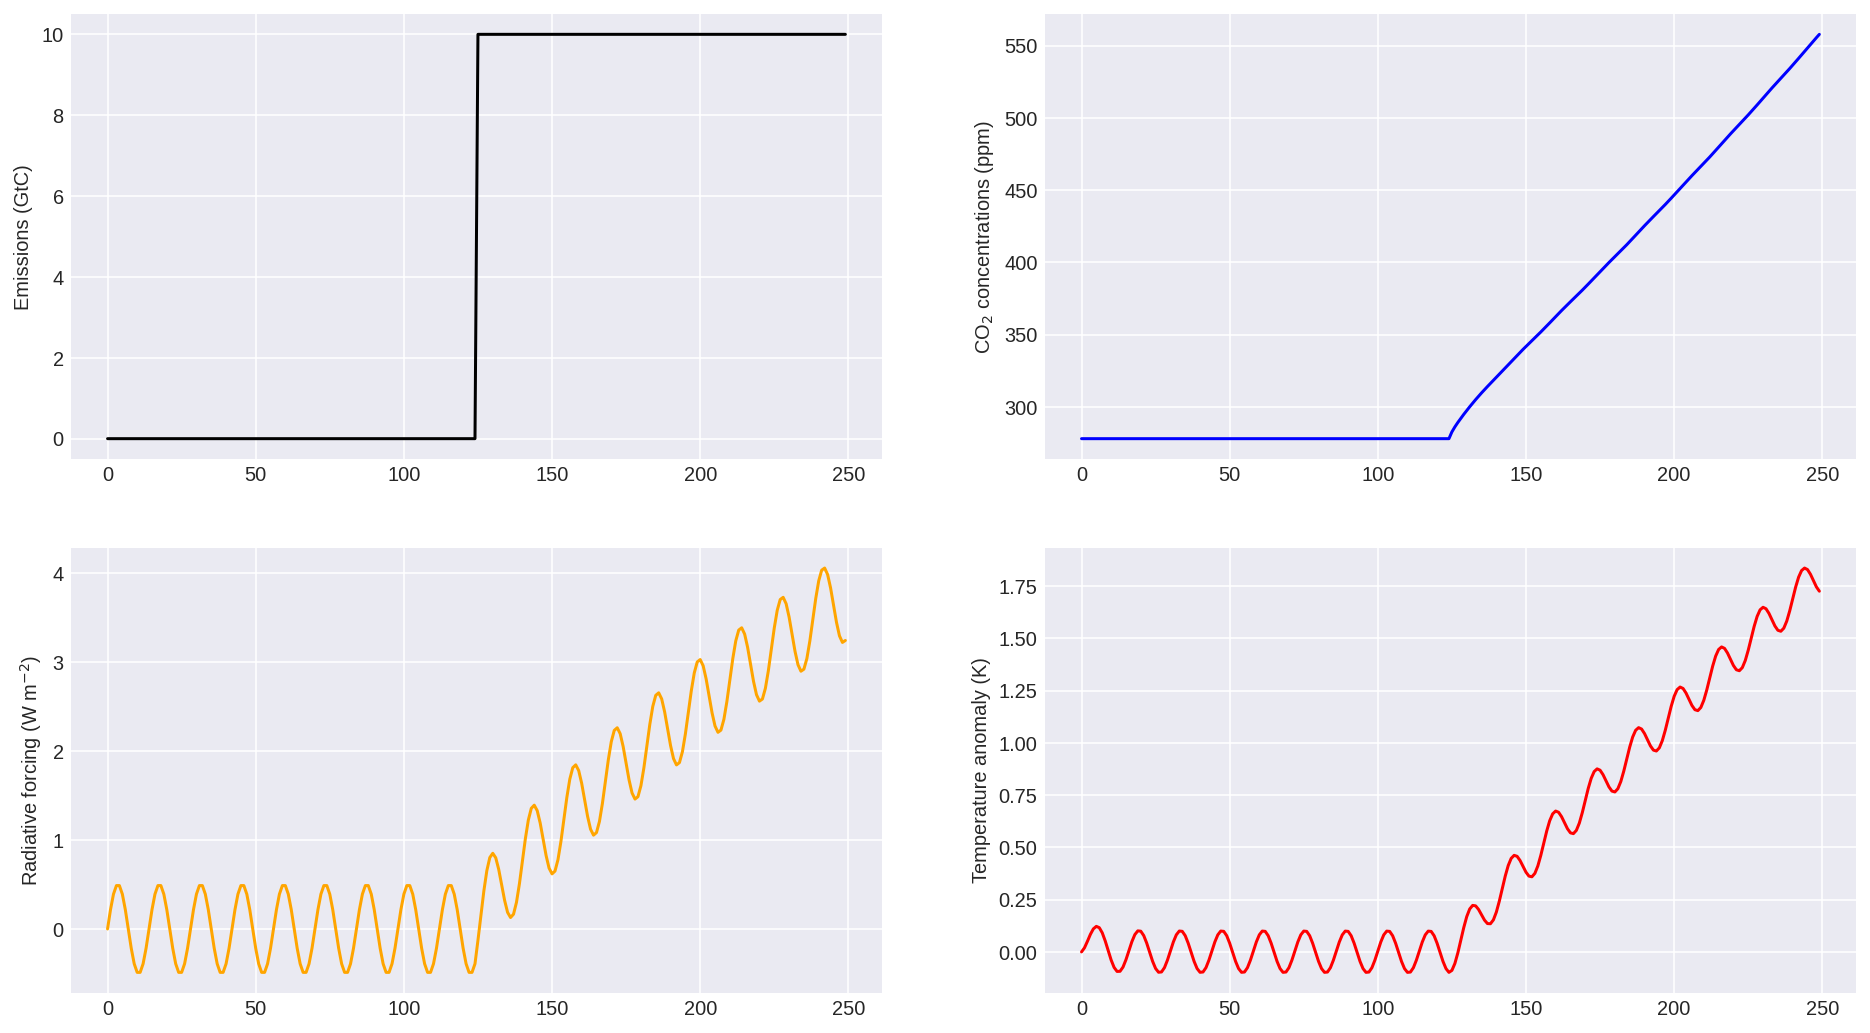

In [6]:
# set up emissions and forcing arrays
emissions = np.zeros(250)   # Unit: GtC
emissions[125:] = 10.0
other_rf = np.zeros(emissions.size)
for x in range(0, emissions.size):
    other_rf[x] = 0.5 * np.sin(2 * np.pi * (x) / 14.0)

# run the model
C,F,T = fair.forward.fair_scm(
    emissions=emissions,
    other_rf=other_rf,
    useMultigas=False
)

# plot the output
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(range(0, emissions.size), emissions, color='black')
ax1.set_ylabel('Emissions (GtC)')
ax2 = fig.add_subplot(222)
ax2.plot(range(0, emissions.size), C, color='blue')
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3 = fig.add_subplot(223)
ax3.plot(range(0, emissions.size), F, color='orange')
ax3.set_ylabel('Radiative forcing (W m$^{-2}$)')
ax4 = fig.add_subplot(224)
ax4.plot(range(0, emissions.size), T, color='red')
ax4.set_ylabel('Temperature anomaly (K)');

# Watch the material in sections 3.1 to 3.4 on Moodle

# 3.5 Practical - Climate sensitivity and the Transient Climate Response in FaIR

The code section plots the CO2 concentration and temperature for two experiments:
- A doubling of CO2 (2xCO2)
- A 1% per year increase in CO2 concentrations (1% per year)

You have two tasks, edit the code to:
- indicate the year, CO2 concentration and temperature associated with the TCR in this model
- Estimate the equilibrium climate sensitivity (you can't know it for sure)

## How to read and edit the code
Look through the code below. I've explained some of what is going on in comments (lines starting with #) but much is unexplained but you should be able to make some informed guesses.
I have indicated where the tasks start with ""### TASK", and the 4 lines that I'd like you to change with ""# CHANGE THIS"

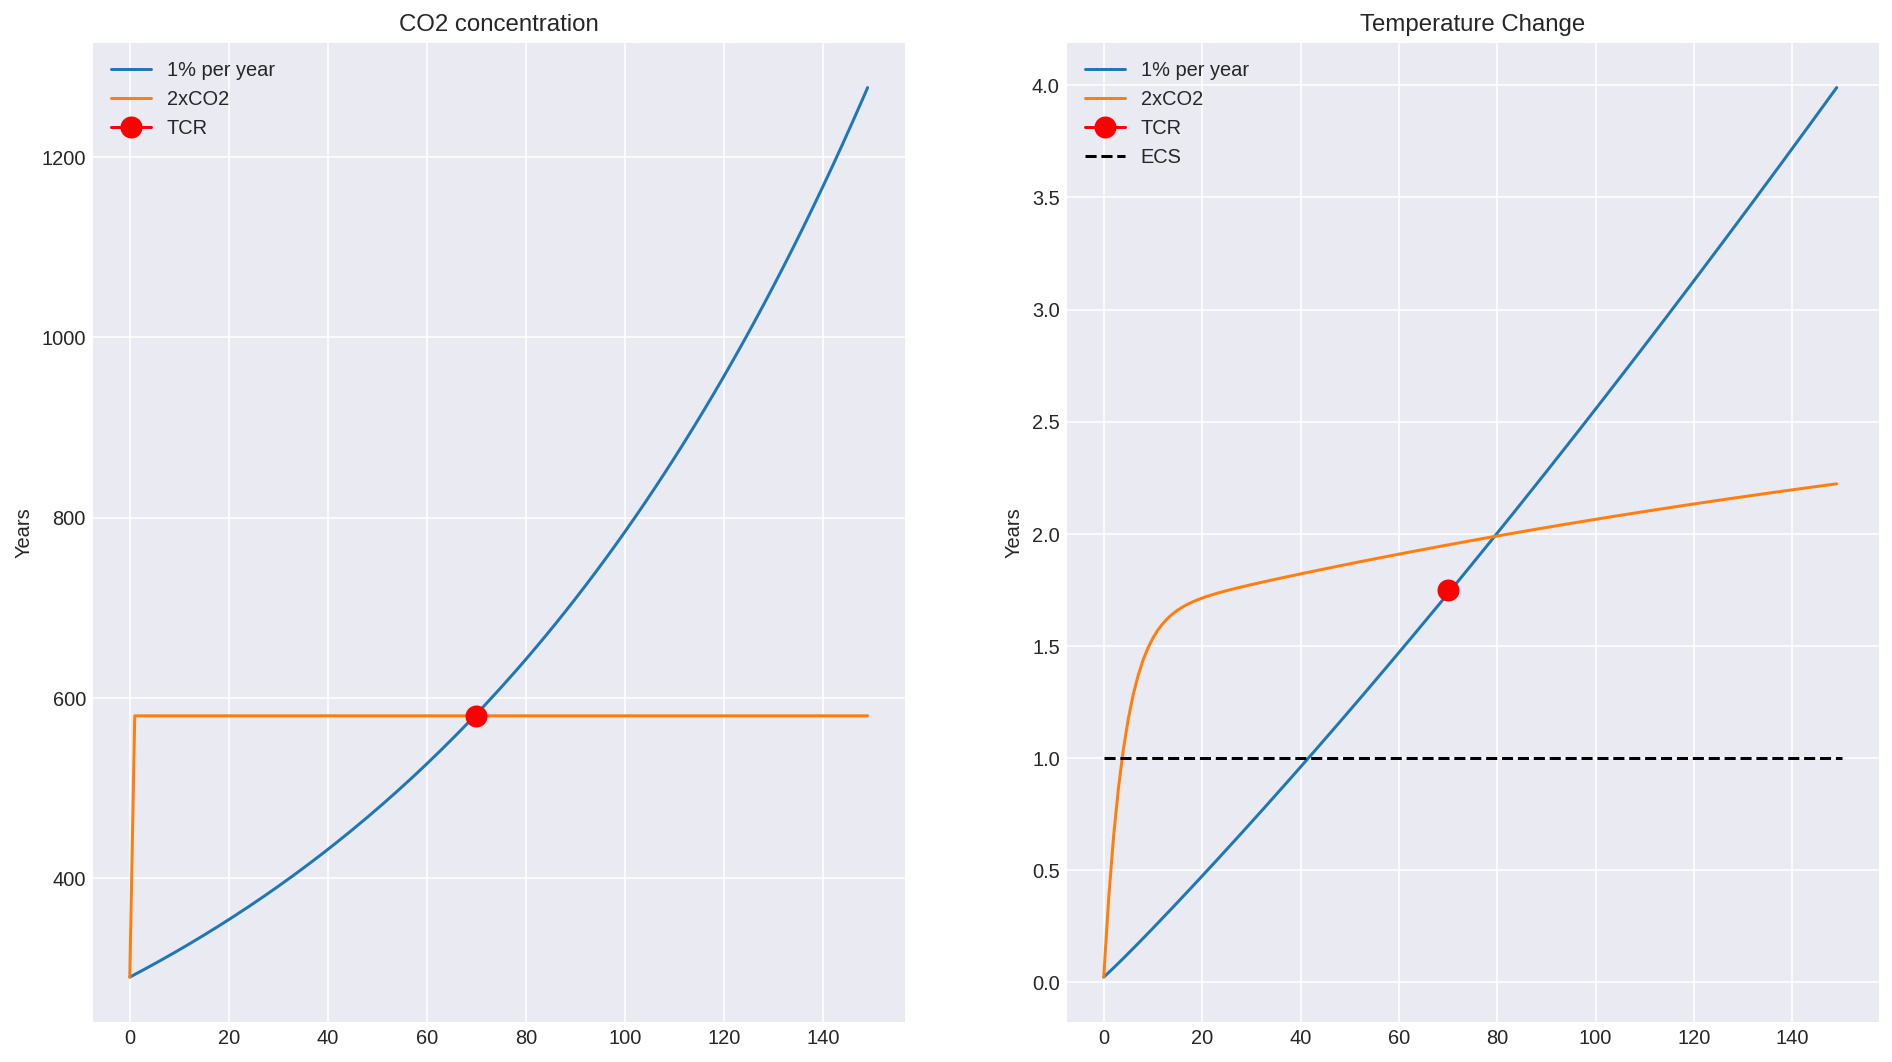

In [18]:
# First I define the evolution of CO2 concentrations over time.
co2_1pc = np.zeros(150) # generate empty arrays 150 elements long (each element is 1 year)
co2_2x = np.zeros(150)
# Loop through these arrays to define a timeseries of CO2 concentration
for x in range(0, co2_1pc.size): 
    co2_1pc[x] = 290 * 1.01**(x) # set the initial CO2 conc (290 ppmv) to increase by 1% per year (**X means to the power X)
    co2_2x[x] = 580 # set CO2 to double its standard setting for all years

co2_2x[0] = 290 # set CO2 in year 1 to original value

# Run the FaIR model to predict the temperature response (and forcing, not shown)
C1,F1,T1 = fair.forward.fair_scm(
    emissions_driven=False,
    C=co2_1pc,
    useMultigas=False)

C2,F2,T2 = fair.forward.fair_scm(
    emissions_driven=False,
    C=co2_2x,
    useMultigas=False)

# Start the figure
fig = plt.figure()
# Define the left-hand CO2 plot
ax1 = fig.add_subplot(121)
# plot the two lexperiments
ax1.plot(C1, label='1% per year')
ax1.plot(C2, label='2xCO2')
# label the plot
ax1.set_ylabel("CO2 concentration (ppmv)")
ax1.set_ylabel("Years")
ax1.set_title("CO2 concentration")

# Define the right-hand Temperature plot
ax2 = fig.add_subplot(122)
ax2.plot(T1, label='1% per year')
ax2.plot(T2, label='2xCO2')
ax2.set_ylabel("Temperature Change (K)")
ax2.set_title("Temperature Change")
ax2.set_ylabel("Years")

### TASK - Use the red dot to indicate the year, CO2 concentration and temperature for the TCR
year = 70 # CHANGE THIS
co2_at_year = 580 # CHANGE THIS - Hint CO2 starts at 290 ppmv
temp_at_year = 1.75 # CHANGE THIS

ax1.plot(year, co2_at_year, marker='o', markersize=10, color="red", label='TCR')
ax2.plot(year, temp_at_year, marker='o', markersize=10, color="red", label='TCR')
# ax2 = point.plot(x=70, y=1.2, ax=ax2, style='r-', label='point')

### TASK - Use the horizontal dashed line to indicate your estimate for the equilibrium climate sensitivity in FaIR
ecs_estimate = 1.0 # CHANGE THIS

ax2.plot([0,150], [ecs_estimate, ecs_estimate], color="k", linestyle="dashed", label='ECS')
# ax2 = point.plot(x=70, y=1.2, ax=ax2, style='r-', label='point')

ax1.legend()
ax2.legend()

## The effect of varying ECS and TCR

In the code section below we simulate the response to a doubling of CO2 and a 1% increase in CO2 for 3 different cases, which sample different values of ECS for a fixed value of TCR.
Run the code and identify the problematic case.

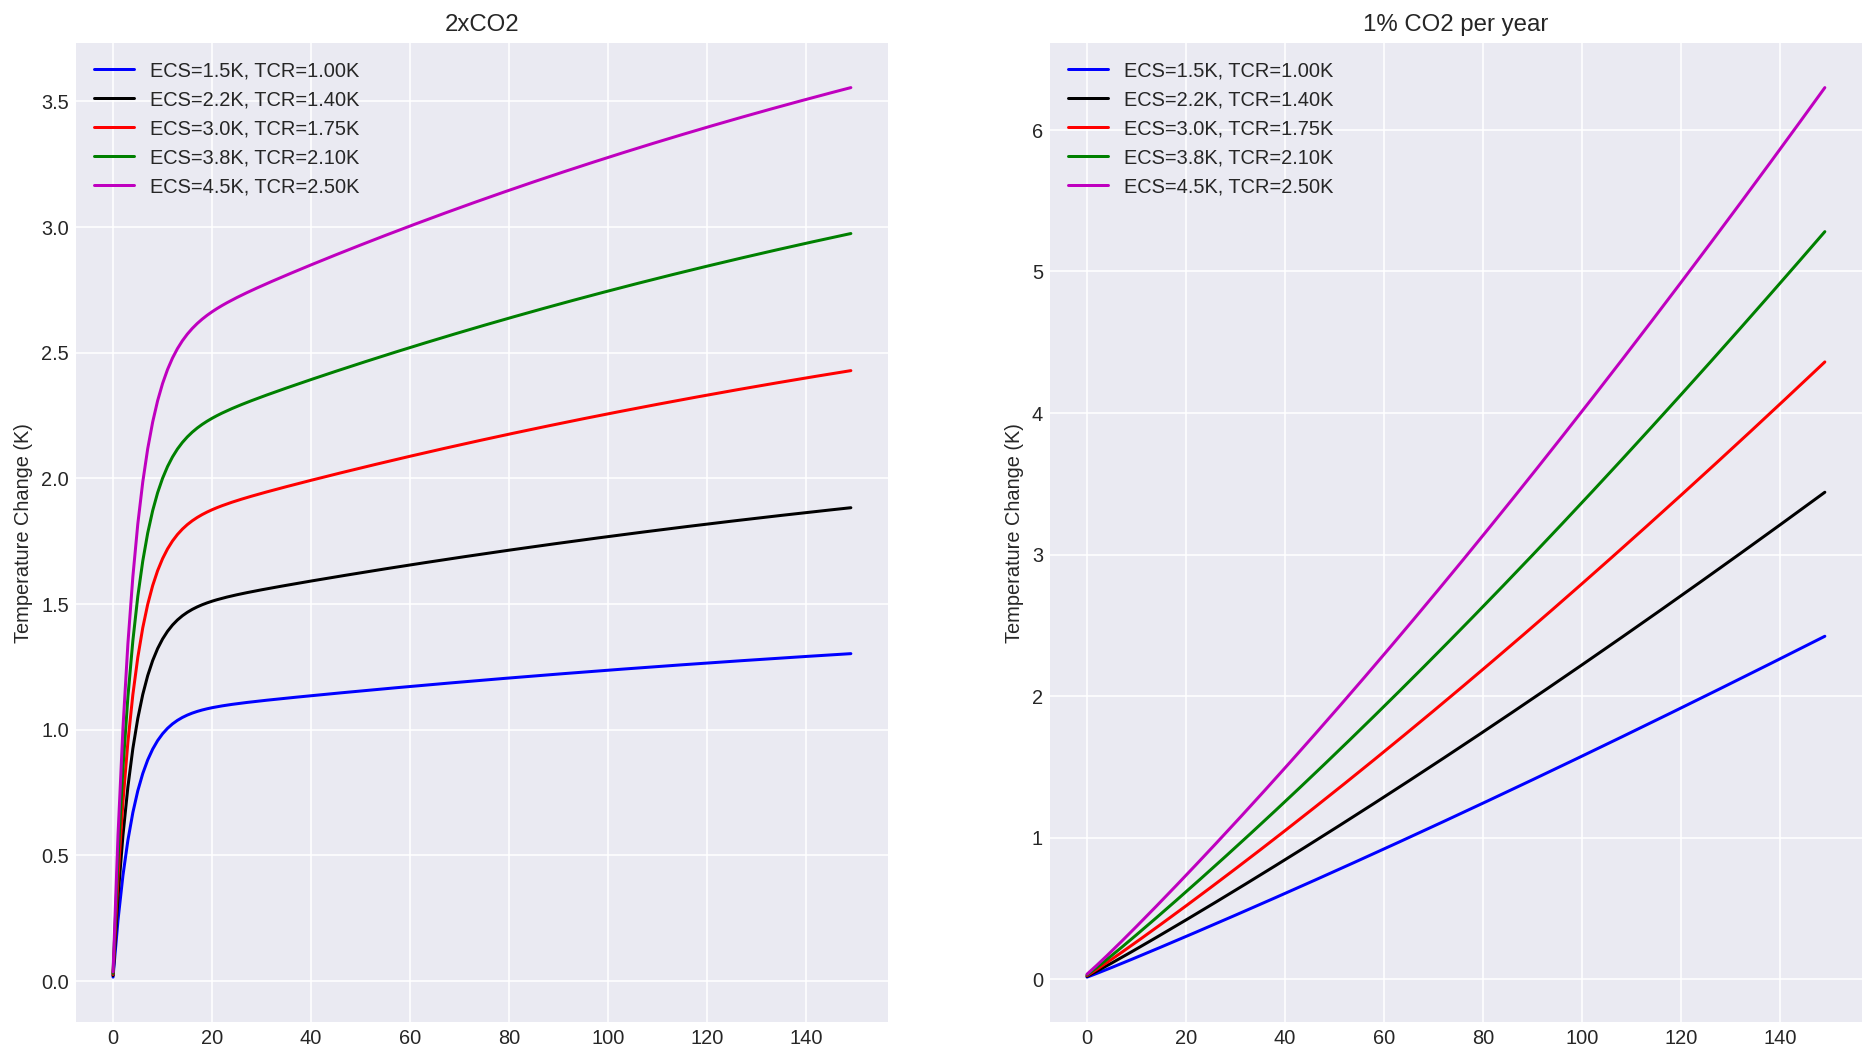

In [20]:
# Here we define a list of 3 cases with different values of ECS, TCR and associated colours.
ecs = np.array([1.5, 2.25, 3.0, 3.75, 4.5])
tcr = np.array([1.0, 1.4, 1.75, 2.1, 2.5])
colors = ['b','k','r','g','m'] # You can add more colours using the names listed here: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

# create output arrays for the FaIR runs for each case
nrun=len(colors)
C1 = np.empty((co2_2x.size, nrun))
F1 = np.empty((co2_2x.size, nrun))
T1 = np.empty((co2_2x.size, nrun))

C2 = np.empty((co2_2x.size, nrun))
F2 = np.empty((co2_2x.size, nrun))
T2 = np.empty((co2_2x.size, nrun))

# initialise plot
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_ylabel('Temperature Change (K)')
ax1.set_title('2xCO2')
ax2 = fig.add_subplot(122)
ax2.set_title('1% CO2 per year')
ax2.set_ylabel('Temperature Change (K)')

# run the model and generate outputs for 2xCO2
for i in range(nrun): # loop over the 3 cases
    C1[:,i],F1[:,i],T1[:,i] = fair.forward.fair_scm(
        emissions_driven=False,
        C=co2_2x,
        useMultigas=False,
        tcrecs=np.array([tcr[i], ecs[i]])
    )
    # plot the 2xCO2 lines
    ax1.plot(T1[:,i], color=colors[i], label='ECS=%3.1fK, TCR=%4.2fK' % (ecs[i], tcr[i]))
ax1.legend()

# run the model and generate outputs for 2xCO2
for i in range(nrun): # loop over the 3 cases
    C2[:,i],F2[:,i],T2[:,i] = fair.forward.fair_scm(
        emissions_driven=False,
        C=co2_1pc,
        useMultigas=False,
        tcrecs=np.array([tcr[i], ecs[i]])
    )
    
    ax2.plot(T2[:,i], color=colors[i], label='ECS=%3.1fK, TCR=%4.2fK' % (ecs[i], tcr[i])) 
ax2.legend()


### QUESTION: Something has gone wrong! which case is problematic and why?

WRITE YOUR ANSWER HERE.

### TASK
replace the TCR value in the problematic case with another physically plausible value (TCR is expected to be between 1.0 to 2.5 K)

### TASK
Copy the code section from above into the code section below.

I want you to plot 10 different cases with ECS values between 1.5 and 4.5 and TCR values between 1.0 and 2.5. These combinations should sample both ranges independently but ensure that all 10 cases are physically plausible.

You will need to edit the first 3 lines of code that specify the arrays of ecs, tcr and colors. Make sure that all three have 10 elements. 

You will need to follow the link to find the list of accepted color names.


In [9]:
# Replace this code box with your copy of the code from above

# Go back to Moodle and complete tasks 3.6 and 3.7

# 3.8 Practical - Climate sensitivity and the Transient Climate Response in FaIR



## The RCP scenarios

The Representative Concentration Pathway (RCP) scenarios are a set of scenarios of future greenhouse gas emissions that climate modelers use as input for their models. The numbers in the scenario refer to the approximate radiative forcing in these scenarios in the year 2100. The scenarios span a range of possible future emissions scenarios from a rapid cut in emissions (RCP2.6) to an extreme upper-end scenario (RCP8.5).

In the version of FaIR below CO2 emissions (not concentrations) are specified and the model predicts the evolution of CO2 concentrations. For the other greenhouse gases a radiative forcing is calculated. 

The code section below shows CO2 emissions, CO2 concentrations, total forcing, and temperature until 2500.

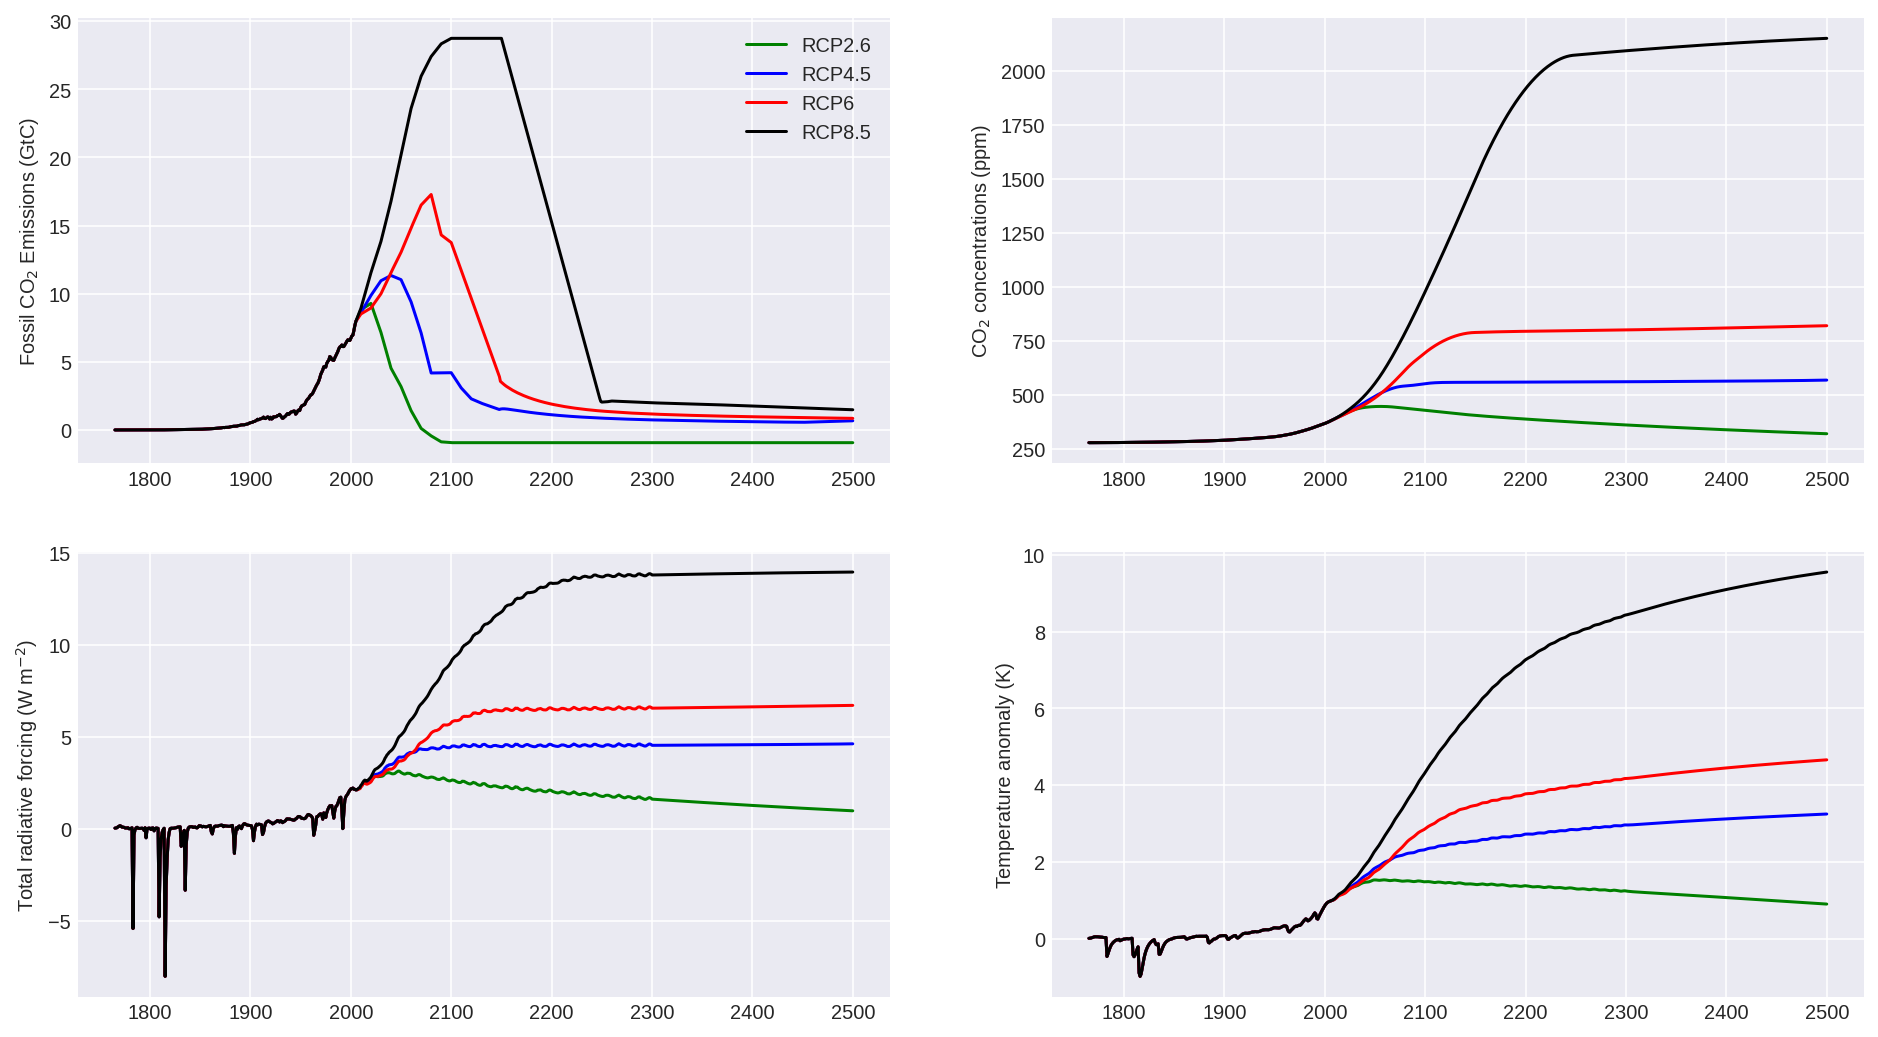

In [10]:
# Get RCP modules
from fair.RCPs import rcp26, rcp45, rcp60, rcp85

# Basic RCP runs
C26, F26, T26 = fair.forward.fair_scm(emissions=rcp26.Emissions.emissions)
C45, F45, T45 = fair.forward.fair_scm(emissions=rcp45.Emissions.emissions)
C60, F60, T60 = fair.forward.fair_scm(emissions=rcp60.Emissions.emissions)
C85, F85, T85 = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(rcp26.Emissions.year, rcp26.Emissions.co2_fossil, color='green', label='RCP2.6')
# just show CO2 conc.
ax2.plot(rcp26.Emissions.year, C26[:, 0], color='green')
# sum over axis 1 to get total ERF
ax3.plot(rcp26.Emissions.year, np.sum(F26, axis=1), color='green')
ax4.plot(rcp26.Emissions.year, T26, color='green')

ax1.plot(rcp45.Emissions.year, rcp45.Emissions.co2_fossil, color='blue', label='RCP4.5')
ax2.plot(rcp45.Emissions.year, C45[:, 0], color='blue')
ax3.plot(rcp45.Emissions.year, np.sum(F45, axis=1), color='blue')
ax4.plot(rcp45.Emissions.year, T45, color='blue')

ax1.plot(rcp60.Emissions.year, rcp60.Emissions.co2_fossil, color='red', label='RCP6')
ax2.plot(rcp60.Emissions.year, C60[:, 0], color='red')
ax3.plot(rcp60.Emissions.year, np.sum(F60, axis=1), color='red')
ax4.plot(rcp60.Emissions.year, T60, color='red')

ax1.plot(rcp85.Emissions.year, rcp85.Emissions.co2_fossil, color='black', label='RCP8.5')
ax2.plot(rcp85.Emissions.year, C85[:, 0], color='black')
ax3.plot(rcp85.Emissions.year, np.sum(F85, axis=1), color='black')
ax4.plot(rcp85.Emissions.year, T85, color='black')

ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC)')
ax1.legend()
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3.set_ylabel('Total radiative forcing (W m$^{-2}$)')
ax4.set_ylabel('Temperature anomaly (K)');

## TASK

In this next code section we will get a sense of the relative significance of climate uncertainty (the values of ECS and TCR) vs. scenario or policy uncertainty (the difference between the RCP scenarios).

Replace the first 3 lines of code with the code you wrote above for the 10 different cases (ECS, TCR and colour).

Run the code

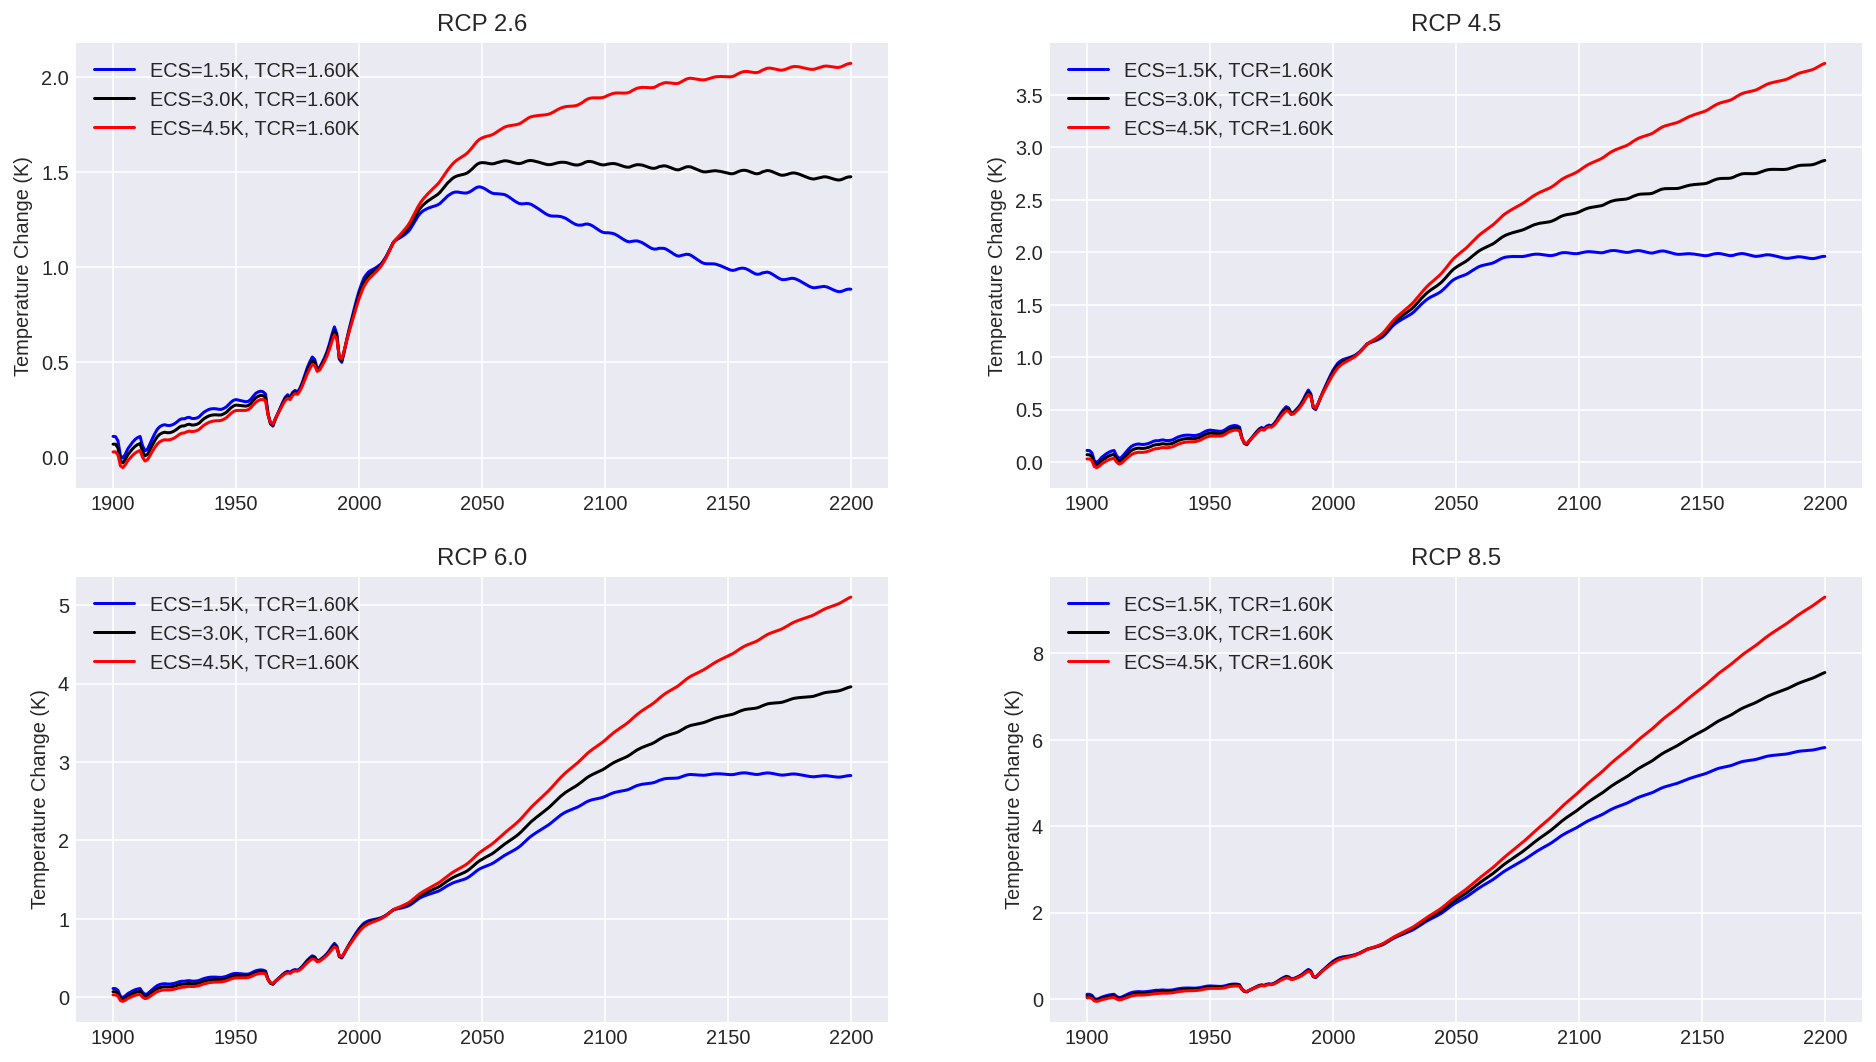

In [11]:
# Here we define a list of 3 cases with different values of ECS, TCR and associated colours.
ecs = np.array([1.5, 3.0, 4.5])
tcr = np.array([1.6, 1.6, 1.6])
colors = ['b','k','r'] # You can add more colours using the names listed here: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

# create output arrays for the FaIR runs for each case
nrun=len(colors) # size of array
years=rcp26.Emissions.year.size # number of years
T26_ens = np.empty((years, nrun))
T45_ens = np.empty((years, nrun))
T60_ens = np.empty((years, nrun))
T85_ens = np.empty((years, nrun))

# initialise plot
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.set_ylabel('Temperature Change (K)')
ax1.set_title('RCP 2.6')
ax2 = fig.add_subplot(222)
ax2.set_ylabel('Temperature Change (K)')
ax2.set_title('RCP 4.5')
ax3 = fig.add_subplot(223)
ax3.set_ylabel('Temperature Change (K)')
ax3.set_title('RCP 6.0')
ax4 = fig.add_subplot(224)
ax4.set_ylabel('Temperature Change (K)')
ax4.set_title('RCP 8.5')

# run the model and generate outputs for 2xCO2
for i in range(nrun): # loop over the 3 cases
    # RCP 2.6
    C, F, T26_ens[:,i] = fair.forward.fair_scm(emissions=rcp26.Emissions.emissions, tcrecs=np.array([tcr[i], ecs[i]]))
    ax1.plot(rcp26.Emissions.year[135:436], T26_ens[135:436,i], color=colors[i], label='ECS=%3.1fK, TCR=%4.2fK' % (ecs[i], tcr[i]))
    # ax1.[THE CODE TO SET Y LIMITS]
    # RCP 4.5
    C, F, T45_ens[:,i] = fair.forward.fair_scm(emissions=rcp45.Emissions.emissions, tcrecs=np.array([tcr[i], ecs[i]]))
    ax2.plot(rcp45.Emissions.year[135:436], T45_ens[135:436,i], color=colors[i], label='ECS=%3.1fK, TCR=%4.2fK' % (ecs[i], tcr[i]))
    # ax2.[THE CODE TO SET Y LIMITS]
    # RCP 6.0
    C, F, T60_ens[:,i] = fair.forward.fair_scm(emissions=rcp60.Emissions.emissions, tcrecs=np.array([tcr[i], ecs[i]]))
    ax3.plot(rcp60.Emissions.year[135:436], T60_ens[135:436,i], color=colors[i], label='ECS=%3.1fK, TCR=%4.2fK' % (ecs[i], tcr[i]))
    # ax3.[THE CODE TO SET Y LIMITS]
    # RCP 8.5
    C, F, T85_ens[:,i] = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions, tcrecs=np.array([tcr[i], ecs[i]]))
    ax4.plot(rcp85.Emissions.year[135:436], T85_ens[135:436,i], color=colors[i], label='ECS=%3.1fK, TCR=%4.2fK' % (ecs[i], tcr[i]))
    # ax4.[THE CODE TO SET Y LIMITS]

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

## TASK: change the y-axis range on all plots to be the same. 
HINT: google it, it's how everyone solves their coding problems ;)

HINT2: try searching for matplotlib or pyplot

HINT3: stack overflow or the matplotlib pyplot manual will be a good place to look

HINT4: I've indicated where you need to insert the code with comments

## QUESTION: It is unclear how much the Earth will warm over the next century. Discuss the relative contribution of climate and scenario uncertainty to the global-mean temperature in 2100.

YOUR ANSWER HERE.

## Now Let's generate another ensemble of FaIR runs and compare it against observed temperatures

A group of model runs is called an ensemble, and it is composed of ensemble members.

The code below generates an ensemble of 100 versions of FaIR with correlated values of ECS and TCR with a distribution that matches the results of an ensemble of full climate models called CMIP5 (more on climate models later).

The black line shows the observed change in global temperatures, and the colored lines are the ensemble members.

In [12]:
from scipy import stats
from fair.tools.ensemble import tcrecs_generate

# generate 100 TCR and ECS pairs, using a lognormal distribution informed by CMIP5 models
tcrecs = tcrecs_generate('cmip5', n=100, dist='lognorm', correlated=True, seed=38571)

# generate some forcing scale factors with SD of 10% of the best estimate
F_scale = stats.norm.rvs(size=(100,13), loc=1, scale=0.1, random_state=40000)
F2x = 3.71 * F_scale[:,0]
F_scale[:,0] = 1.0  # set CO2 forcing scaling with F2x above

# generate ensemble for carbon cycle parameters
r0 = stats.norm.rvs(size=100, loc=35, scale=3.5, random_state=41000)
rc = stats.norm.rvs(size=100, loc=0.019, scale=0.0019, random_state=42000)
rt = stats.norm.rvs(size=100, loc=4.165, scale=0.4165, random_state=45000)

nt = len(rcp45.Emissions.year)
T = np.zeros((nt,100))

for i in range(100):
    _, _, T[:,i] = fair_scm(emissions=rcp85.Emissions.emissions,
                            r0 = r0[i],
                            rc = rc[i],
                            rt = rt[i],
                            tcrecs = tcrecs[i,:],
                            scale = F_scale[i,:],
                            F2x = F2x[i]
                           )

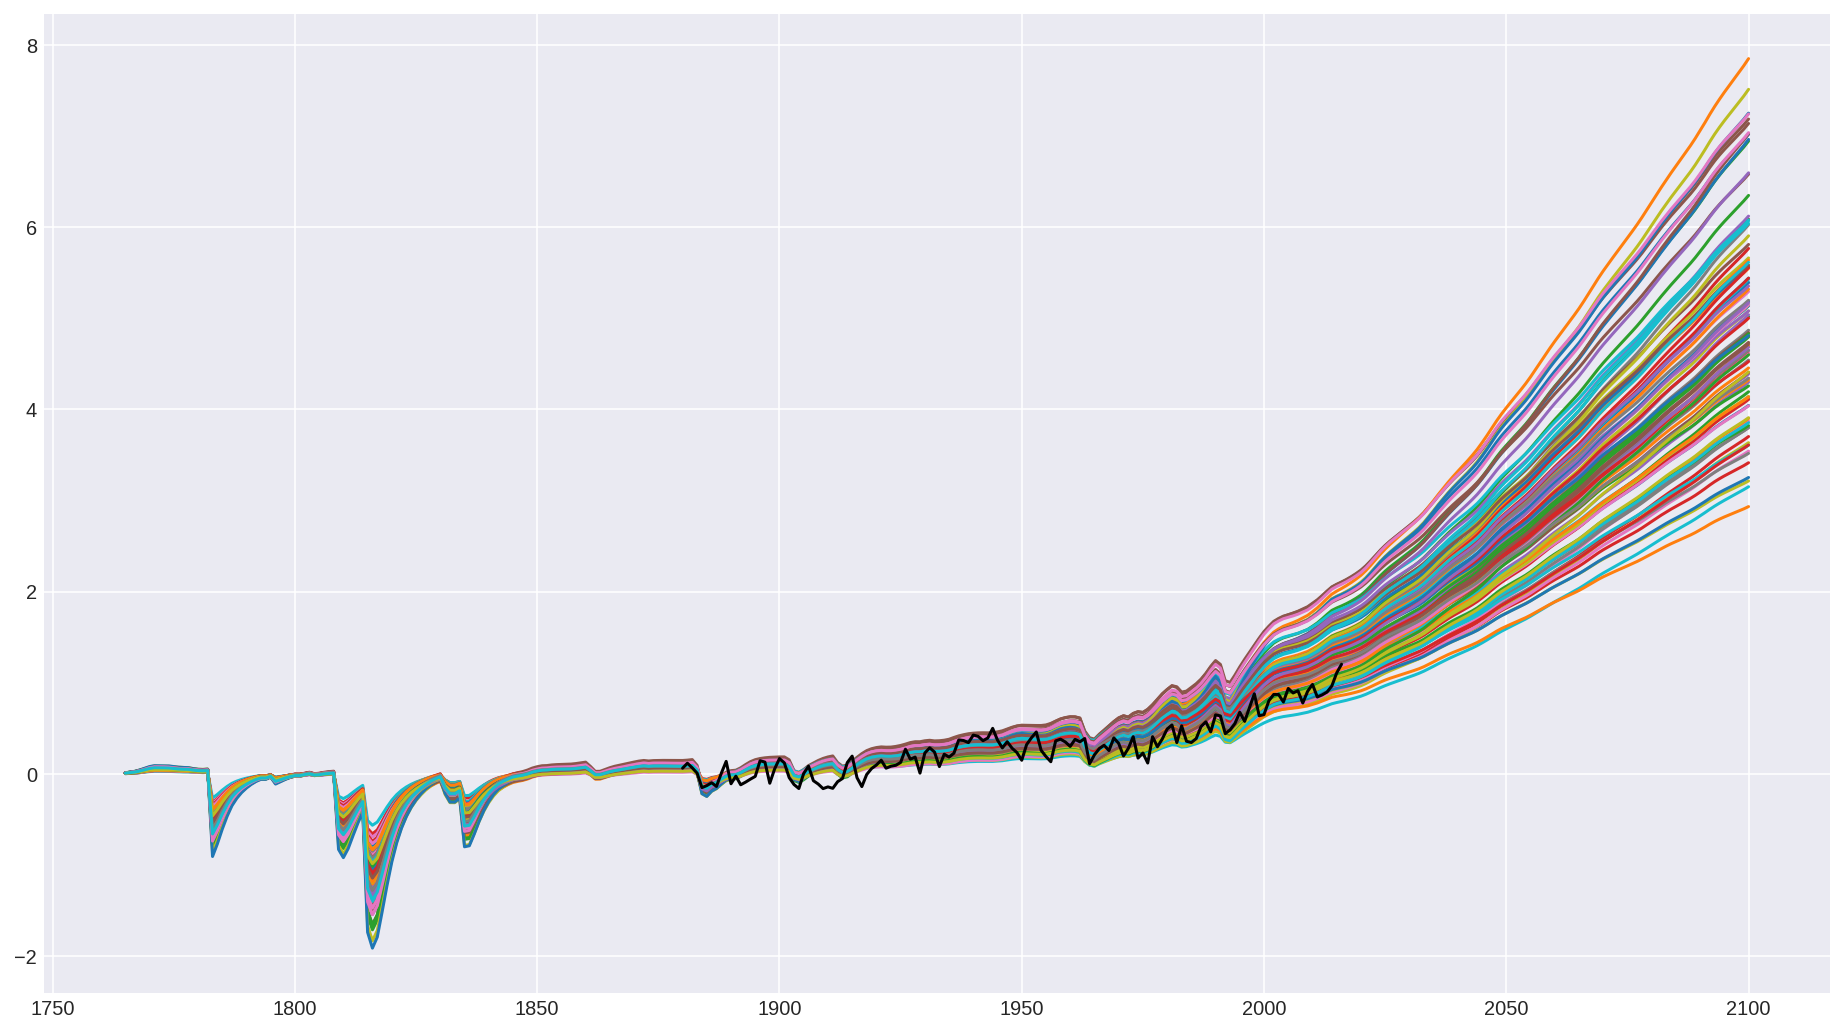

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(rcp85.Emissions.year[0:336], T[0:336,:]);

# Cowtan & Way in-filled dataset of global temperatures
CW = np.loadtxt('had4_krig_annual_v2_0_0.csv')
ax1.plot(CW[30:,0], CW[30:,1]+0.35, color='k'); # This black line is to show you the observations but note I eyeballed the offset as I didn't know it.

## Adding a temperature constraint

The resulting projections show a large spread. Some of these ensemble members are unrealistic, but we can constrain the ensemble to observations, removing those ensemble members that are too far from the observed global temperature change.

46


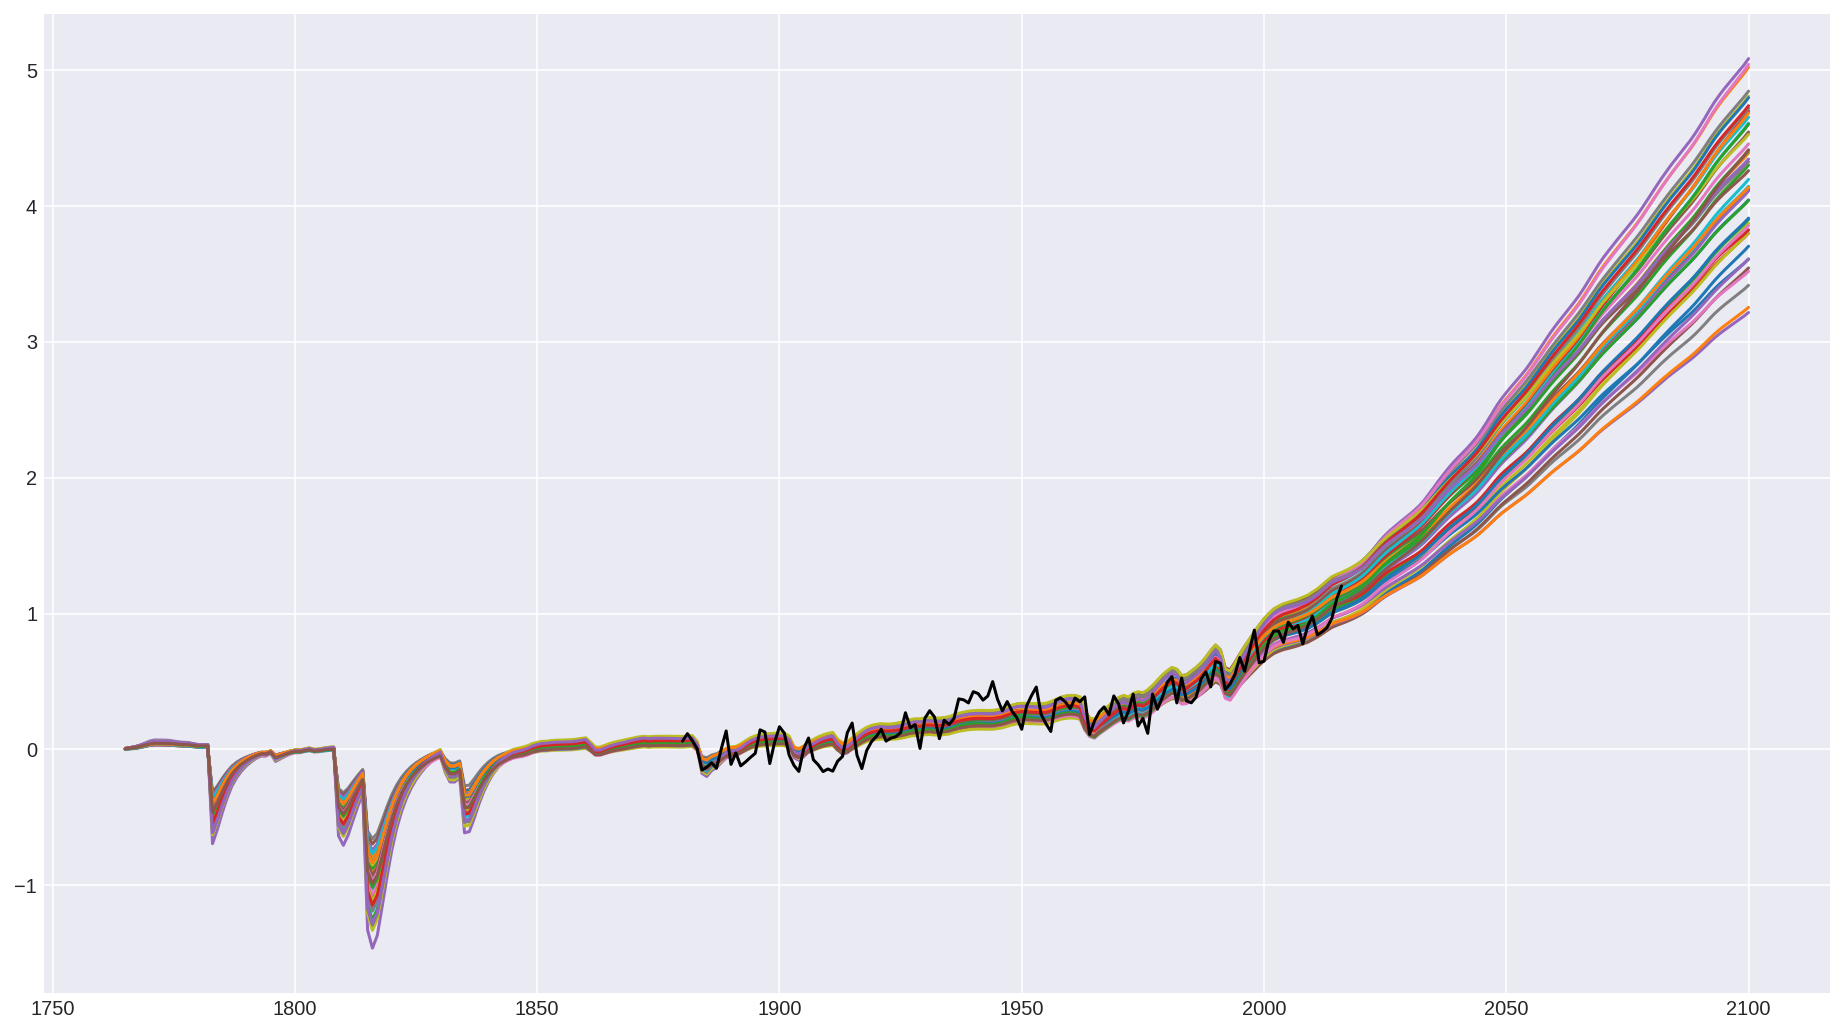

In [14]:
from fair.tools.constrain import hist_temp

# Cowtan & Way in-filled dataset of global temperatures
CW = np.loadtxt('had4_krig_annual_v2_0_0.csv')
constrained = np.zeros(100, dtype=bool)
for i in range(100):
    # we use observed trend from 1880 to 2016
    constrained[i],_,_,_,_ = hist_temp(
        CW[30:,1], T[1880-1765:2017-1765,i], CW[30:,0])

# How many ensemble members passed the constraint?
print (np.sum(constrained))

# What does this do to the ensemble?
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(rcp85.Emissions.year[0:336], T[0:336,constrained]);
ax1.plot(CW[30:,0], CW[30:,1]+0.35, color='k'); # This black line is to show you the observations but note I eyeballed the offset as I didn't know it.

## QUESTION: How has the temperature constraint changed the projected range of temperatures for 2100? Give values for the upper and lower bound and the best guess from the graphs above and explain how this constraint has worked.

YOUR ANSWER HERE

# 3.9 - Cumulative CO2 vs Temperature, carbon budgets, and the Transient Climate response to emissions

As we saw before the RCP scenarios have very different CO2, forcing and temperature evolutions over time but they share a common feature. 

The code section below plots total cumulative CO2 emissions from the pre-industrial (adding each year's emissions on to the last) against global-mean temperature for the years 2000 to 2100

Text(0.5, 1.0, 'Cumulative CO2 vs. Temperature')

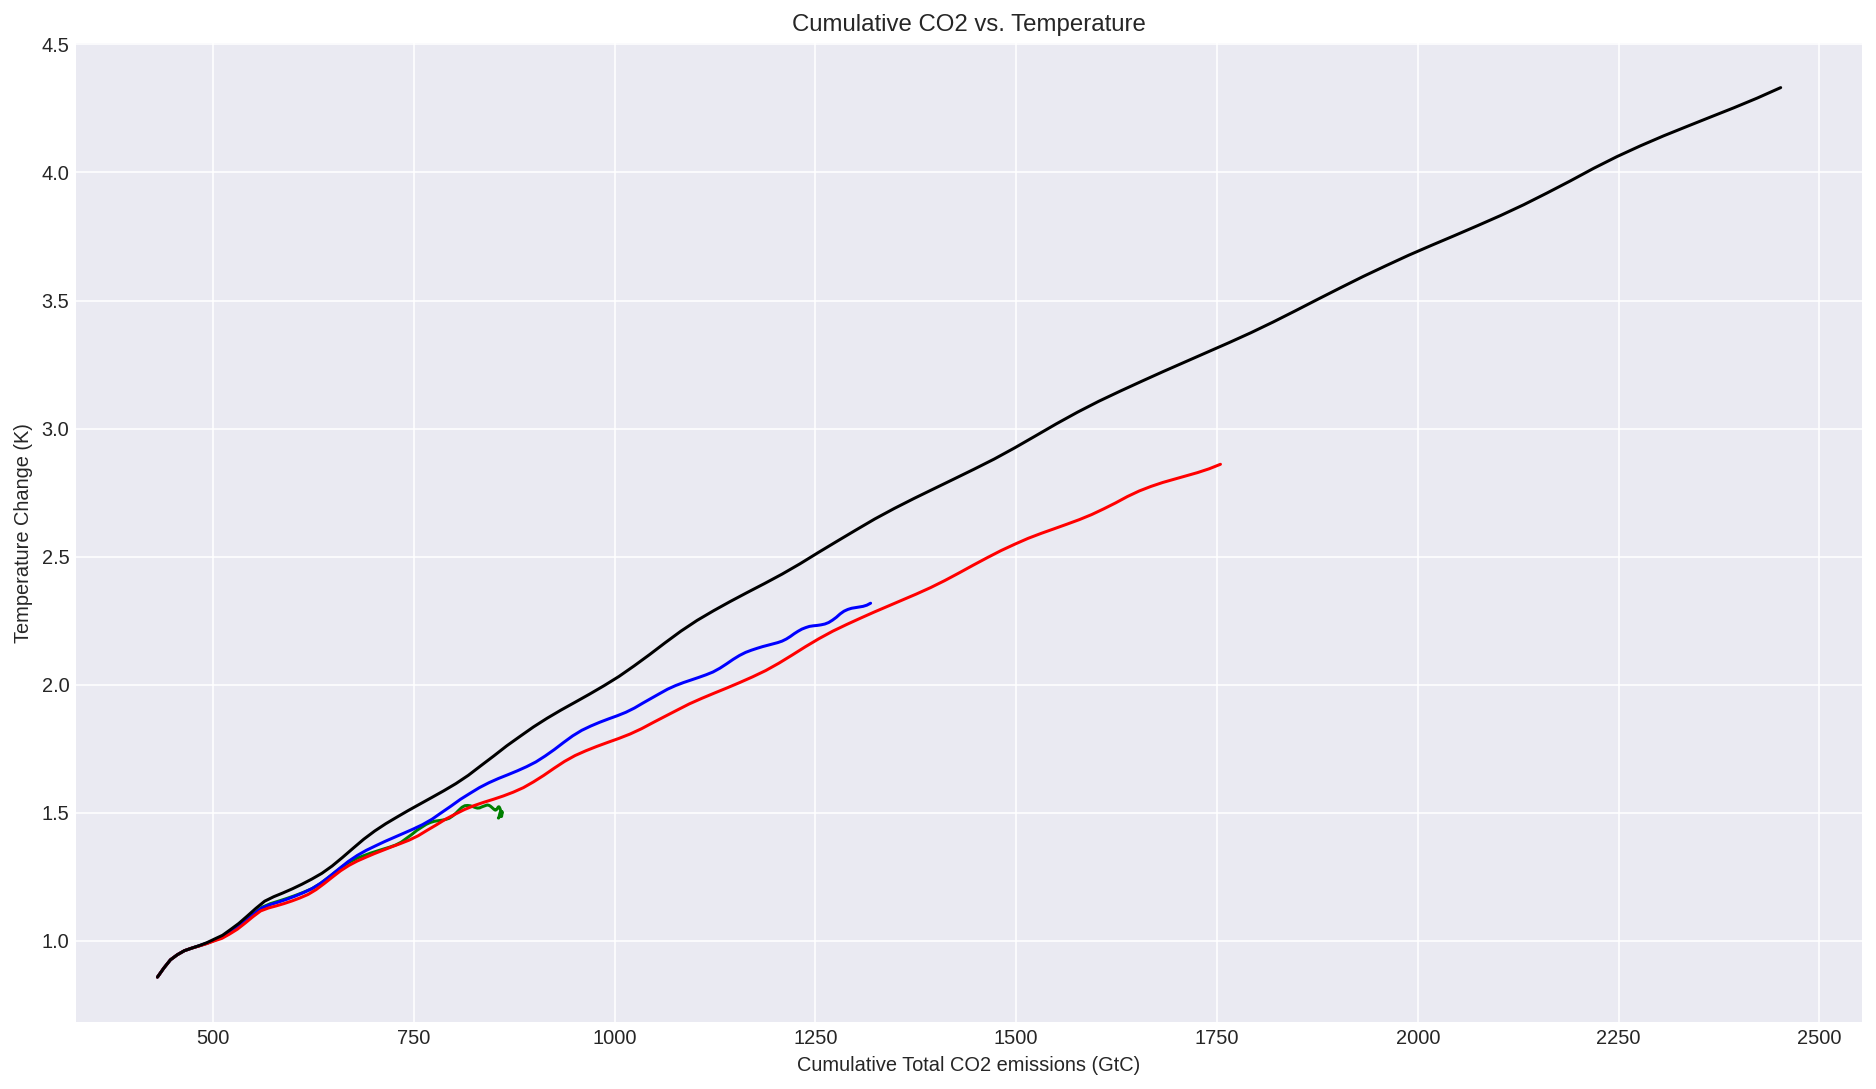

In [15]:
# Basic RCP runs
C26, F26, T26 = fair.forward.fair_scm(emissions=rcp26.Emissions.emissions)
C45, F45, T45 = fair.forward.fair_scm(emissions=rcp45.Emissions.emissions)
C60, F60, T60 = fair.forward.fair_scm(emissions=rcp60.Emissions.emissions)
C85, F85, T85 = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions)

rcp26_cum_sum_emit = np.cumsum(rcp26.Emissions.co2_fossil + rcp26.Emissions.emissions[:,2])
rcp45_cum_sum_emit = np.cumsum(rcp45.Emissions.co2_fossil + rcp26.Emissions.emissions[:,2])
rcp60_cum_sum_emit = np.cumsum(rcp60.Emissions.co2_fossil + rcp26.Emissions.emissions[:,2])
rcp85_cum_sum_emit = np.cumsum(rcp85.Emissions.co2_fossil + rcp26.Emissions.emissions[:,2])

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

start_idx = 235
end_idx = 336

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(rcp26_cum_sum_emit[start_idx:end_idx], T26[start_idx:end_idx], color='green')
ax1.plot(rcp45_cum_sum_emit[start_idx:end_idx], T45[start_idx:end_idx], color='blue')
ax1.plot(rcp60_cum_sum_emit[start_idx:end_idx], T60[start_idx:end_idx], color='red')
ax1.plot(rcp85_cum_sum_emit[start_idx:end_idx], T85[start_idx:end_idx], color='black')
ax1.set_ylabel("Temperature Change (K)")
ax1.set_xlabel("Cumulative Total CO2 emissions (GtC)")
ax1.set_title("Cumulative CO2 vs. Temperature")

## QUESTION: Why is this quasi-linear relationship surprising? Hint: think through the various factors between CO2 emissions and temperature and briefly describe their relationship to temperature and their evolution over time.

NOTE: all the lines start in the year 2000 and end in the year 2100. RCP8.5 has emitted much more and warmed much more than RCP2.6 hence the line is longer.

YOUR ANSWER HERE.

## Carbon budgets
Using the fact that there is a relationship between cumulative CO2 emissions and global-mean temperature it is possible to calculate the remaining carbon budget to stay below a certain temperature threshold.

## TASK: calculate the remaining carbon budget to stay below 1.5 K of warming. copy some of the code above to find a precise value, use comments to explain your code and working.
HINT: the variable "start_idx" specifies the index for the year 2000

HINT2: an example print statement is shown below.

In [16]:
# REPLACE THIS CODE BOX WITH YOUR OWN

print("In the year 2000 in the RCP4.5 scenario the world had warmed by:", T45[235], "K")

In the year 2000 in the RCP4.5 scenario the world had warmed by: 0.857640067655558 K


## The Transient Climate Response to Emissions

Given that there is a robust, linear relationship between cumulative CO2 and emissions it is possible to calculate a metric that quantifies the warming expected for a given increase in cumulative emissions.

The Transient Climate Response to Emissions (TCRE) is measured in K per TtC (Trillion tons Carbon).

## TASK: Plot cumulative CO2 vs. temperature for your ensemble.
Copy the code that produces the cumulative CO2 vs temperature plot into the code section below.

Comment out (add a # at the start) the lines which plot all the RCP scenarios except for RCP8.5. HINT: pressing [CTRL and /] comments out the line you have selected, or uncomments the line if it is already commented out.

Replace "T85" with "T85_ens" in the code below to plot the 10 ensemble members you generated with different versions of ECS and TCR

In [17]:
# your code here

## QUESTION: What is your estimate of the best guess for TCRE and the range for your ensemble?
HINT: what is the temperature difference between 500 GtC and 1500 GtC of Cumulative CO2 emissions in your plot above?

YOUR ANSWER HERE

## FIN - well done! You are finished.